In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get the Data

In [40]:
df= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')

In [41]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [42]:
df.columns = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Class_value'] #the columns names can be found on UCI website above

In [43]:
df.head()

,Buying,Maint,Doors,Persons,Lug_boot,Safety,Class_value
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [44]:
df.describe().T

,count,unique,top,freq
Buying,1727,4,high,432
Maint,1727,4,high,432
Doors,1727,4,3,432
Persons,1727,3,4,576
Lug_boot,1727,3,med,576
Safety,1727,3,med,576
Class_value,1727,4,unacc,1209


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Buying       1727 non-null   object
 1   Maint        1727 non-null   object
 2   Doors        1727 non-null   object
 3   Persons      1727 non-null   object
 4   Lug_boot     1727 non-null   object
 5   Safety       1727 non-null   object
 6   Class_value  1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# DATA exploring 

In [46]:
# let's first look at the target column

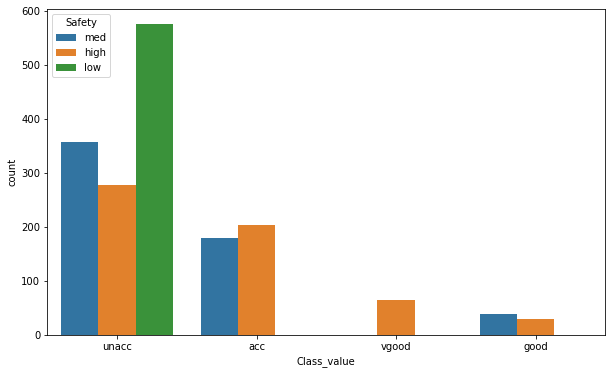

In [50]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Class_value', data=df, hue='Safety'); # cars with good acceptability tend to have medium and hight safety level

<AxesSubplot:xlabel='Class_value', ylabel='count'>

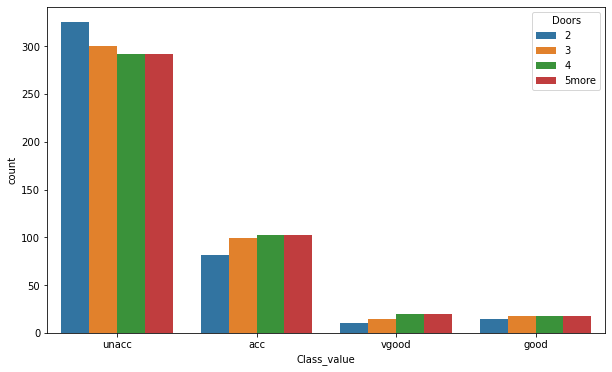

In [51]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Class_value', data=df, hue='Doors') # cars with different level of acceptability have almost equal number of cars with different doors

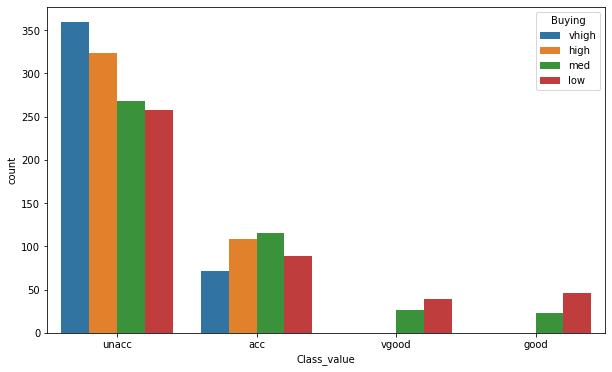

In [52]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Class_value', data=df, hue='Buying'); # cars with good acceptability are Usually not very expensive to buy

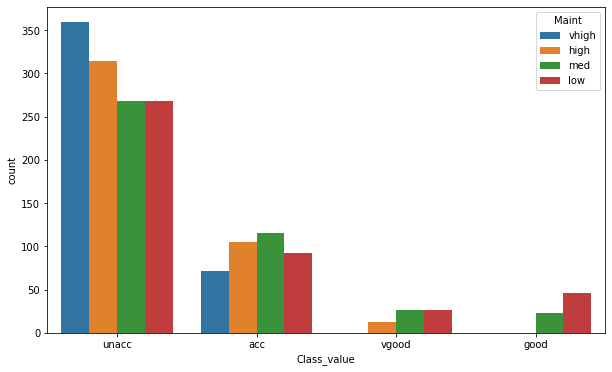

In [53]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Class_value', data=df, hue='Maint');# again cars with good acceptability are Usually not very expensive to maintain as well 

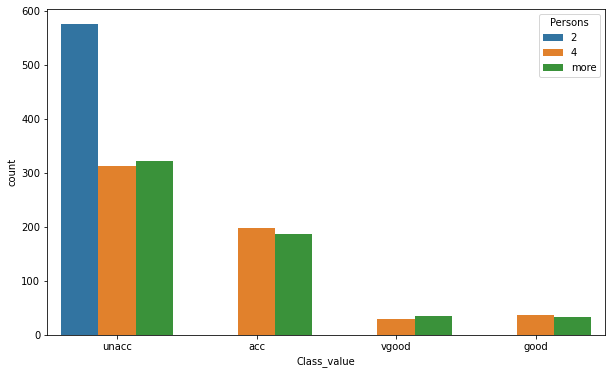

In [54]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Class_value', data=df, hue='Persons'); # cars that only have two seats are normally low in acceptability

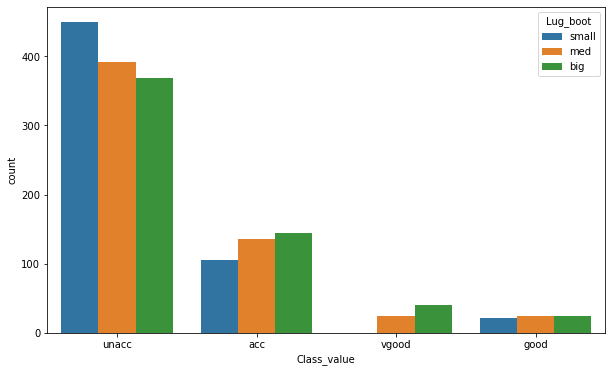

In [55]:
fig = plt.figure(figsize=(10,6))
sns.countplot(x='Class_value', data=df, hue='Lug_boot'); # cars with very good acceptability don't have small luggage boot

# Data feature engineering 

In [56]:
# since this dataset only contains categorical data, we can use get_dummies for the whole dataset

In [59]:
df.columns

Index(['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety',
       'Class_value'],
      dtype='object')

In [60]:
X = df.drop('Class_value', axis=1).copy()
y = df['Class_value']

In [ ]:
X =pd.get_dummies(X)

# Build and train a model 

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

In [74]:
y.unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [100]:
Xtrain,Xtest, ytrain,ytest= train_test_split(X, y, test_size=0.3, random_state=42, stratify=y) # cause the target column is inbalanced, therefore we use stratify=y

In [101]:
tree = DecisionTreeClassifier()

In [102]:
tree.fit(Xtrain,ytrain)

DecisionTreeClassifier()

In [103]:
export_graphviz(tree, out_file='tree.dot', class_names=y.unique() , feature_names=X.columns, impurity=False, filled=True)

In [104]:
file = open('tree.dot', 'r')
graph = file.read()

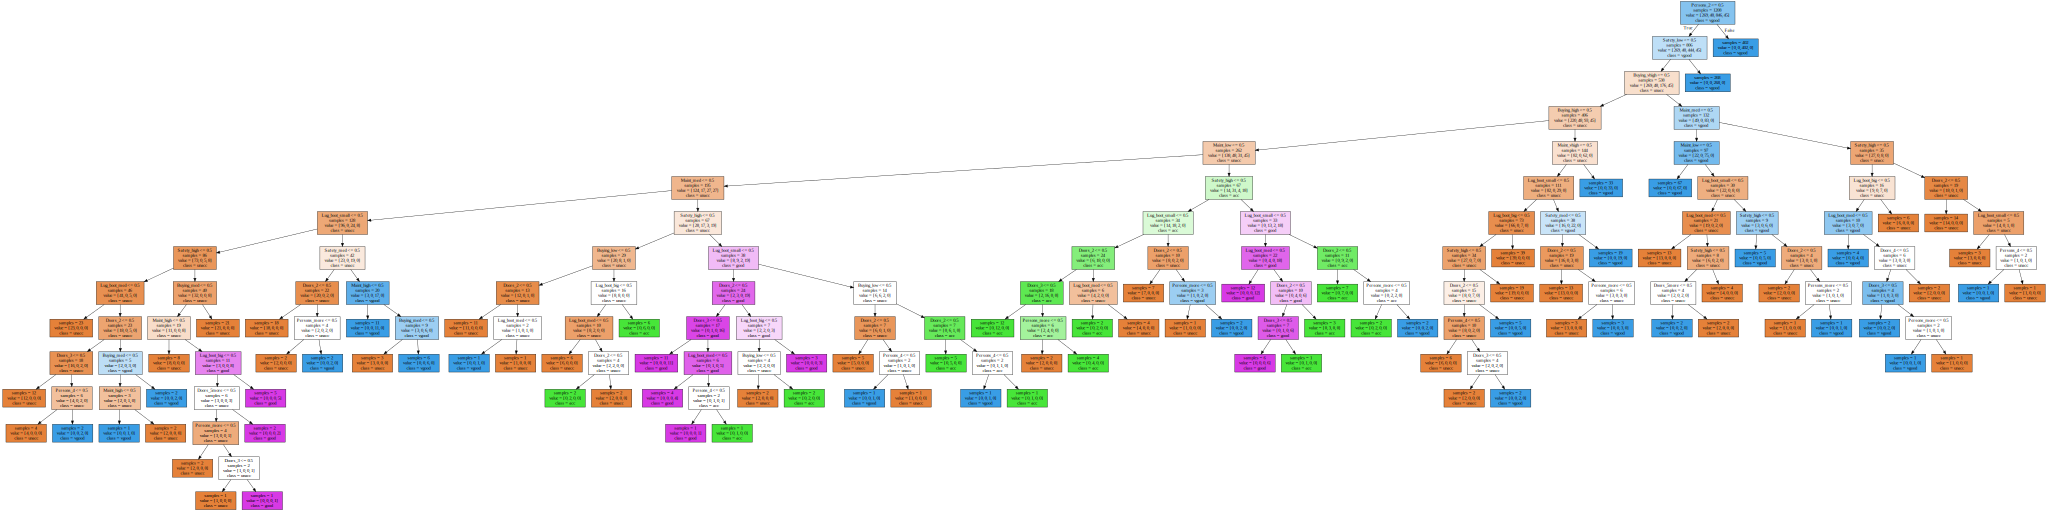

In [105]:
graphviz.Source(graph)

# Model evaluation

In [96]:
pred = tree.predict(Xtest)

In [97]:
from sklearn.metrics import classification_report, confusion_matrix

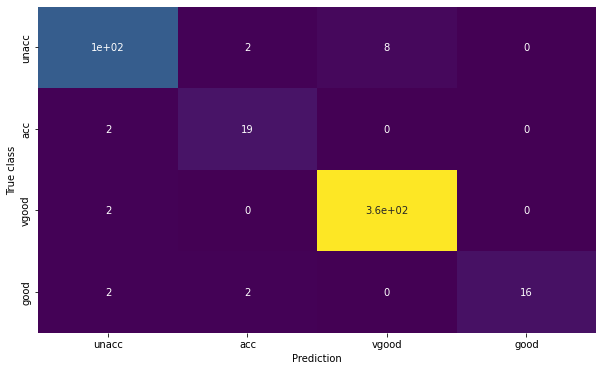

In [125]:
fig = plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(ytest, pred),cmap='viridis', annot=True,
           xticklabels=y.unique(), yticklabels=y.unique(), cbar=False)
plt.xlabel('Prediction')
plt.ylabel('True class');

In [99]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

         acc       0.95      0.91      0.93       115
        good       0.83      0.90      0.86        21
       unacc       0.98      0.99      0.99       363
       vgood       1.00      0.80      0.89        20

    accuracy                           0.97       519
   macro avg       0.94      0.90      0.92       519
weighted avg       0.97      0.97      0.96       519



In [136]:
single_sample = X.iloc[58,:].values.reshape(-1,21)

In [139]:
prediction = tree.predict(single_sample)

In [140]:
true_label = y.iloc[58]

In [141]:
true_label

'unacc'

In [148]:
prediction[0] # this model performs well 

'unacc'